# Developing a Predictive Model for Social Media Engagement


### As My name is Heni Patel so I have to Logistic Regression

## 1. Importing Libraries

In [1]:
#importing the required libraries

# linear algebra
import numpy as np

# data Processing
import pandas as pd

# data visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
#importing the decision tree module

from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

## 2. Loading The Dataset

In [3]:
social_media_data = pd.read_csv("social_media_data.csv")

In [4]:
# printing the information of dataset

social_media_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Post Content             96 non-null     object
 1   Post Frequency           96 non-null     int64 
 2   Time of Day              96 non-null     object
 3   Hashtags                 96 non-null     object
 4   User Engagement History  96 non-null     int64 
 5   Post Format              96 non-null     object
 6   Audience Demographics    96 non-null     object
 7   Likes                    96 non-null     int64 
 8   Comments                 96 non-null     int64 
 9   Shares                   96 non-null     int64 
dtypes: int64(5), object(5)
memory usage: 7.6+ KB


In [5]:
# Printing the head

social_media_data.head()

,Post Content,Post Frequency,Time of Day,Hashtags,User Engagement History,Post Format,Audience Demographics,Likes,Comments,Shares
0,Exciting news! Our new product is now available!,3,Morning,#newproduct #exciting,2000,Image,"Young adults, US",250,50,100
1,Check out this amazing recipe!,1,Evening,#recipe #food,1500,Text,"Food lovers, Worldwide",100,30,20
2,Happy Friday! Join us for a special event.,2,Afternoon,#fridayevent #fun,3000,Image,"All ages, UK",500,100,150
3,"New blog post: ""10 Tips for Success""",1,Morning,#blogging #success,500,Text,"Professionals, US",50,10,5
4,Exclusive offer! Limited time only.,1,Evening,#exclusive #sale,2500,Image,"Shoppers, Worldwide",300,70,50


## 3. Data Preparation and Pre-processing 

In [6]:
# Converting 'Time of Day' data transformation

social_media_data.replace({'Time of Day': {'Morning': 1, 'Evening': 2, 'Afternoon': 3}}, inplace = True)


In [7]:
social_media_data.head()

,Post Content,Post Frequency,Time of Day,Hashtags,User Engagement History,Post Format,Audience Demographics,Likes,Comments,Shares
0,Exciting news! Our new product is now available!,3,1,#newproduct #exciting,2000,Image,"Young adults, US",250,50,100
1,Check out this amazing recipe!,1,2,#recipe #food,1500,Text,"Food lovers, Worldwide",100,30,20
2,Happy Friday! Join us for a special event.,2,3,#fridayevent #fun,3000,Image,"All ages, UK",500,100,150
3,"New blog post: ""10 Tips for Success""",1,1,#blogging #success,500,Text,"Professionals, US",50,10,5
4,Exclusive offer! Limited time only.,1,2,#exclusive #sale,2500,Image,"Shoppers, Worldwide",300,70,50


In [8]:
# checking the null values

social_media_data.isnull().sum()

Post Content               0
Post Frequency             0
Time of Day                0
Hashtags                   0
User Engagement History    0
Post Format                0
Audience Demographics      0
Likes                      0
Comments                   0
Shares                     0
dtype: int64

In [9]:
# Looking at the correlation matrix for the maximum correlated variables with the Likes variable 

correlation_matrix = social_media_data.corr().round(2)
print(correlation_matrix)

                         Post Frequency  Time of Day  User Engagement History  \
Post Frequency                     1.00         0.48                     0.19   
Time of Day                        0.48         1.00                     0.18   
User Engagement History            0.19         0.18                     1.00   
Likes                              0.30         0.29                     0.83   
Comments                           0.24         0.25                     0.86   
Shares                             0.28         0.28                     0.82   

                         Likes  Comments  Shares  
Post Frequency            0.30      0.24    0.28  
Time of Day               0.29      0.25    0.28  
User Engagement History   0.83      0.86    0.82  
Likes                     1.00      0.98    0.96  
Comments                  0.98      1.00    0.96  
Shares                    0.96      0.96    1.00  


In [10]:
# seggregating the x i.e independent variable and target y variables

x = social_media_data[['Post Frequency','Time of Day','User Engagement History','Comments','Shares']]
y = social_media_data['Likes']

In [11]:
# Making a label array

labels= ['Post Frequency','Time of Day','User Engagement History','Comments','Shares']

In [12]:
# Looking at Min and Max

print(x.min())
print(x.max())

Post Frequency               1
Time of Day                  1
User Engagement History    500
Comments                    10
Shares                       5
dtype: int64
Post Frequency                3
Time of Day                   3
User Engagement History    4500
Comments                    110
Shares                      150
dtype: int64


In [14]:
# Applying Normalization on the data for more easier convergence

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled)

In [15]:
X.head()

,0,1,2,3,4
0,1.0,0.0,0.375,0.4,0.655172
1,0.0,0.5,0.250,0.2,0.103448
2,0.5,1.0,0.625,0.9,1.000000
3,0.0,0.0,0.000,0.0,0.000000
4,0.0,0.5,0.500,0.6,0.310345


## 4. Model Building

In [16]:
# 80% is train data and 20% is test data

X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(76, 5)
(20, 5)
(76,)
(20,)


In [18]:
#instantiate the model
logistic_regression = LogisticRegression() 


# fit the model with data
logistic_regression.fit(X_train,Y_train)

LogisticRegression()

## 5. Prediction

In [19]:
# Predicting with the test data

Y_pred = logistic_regression.predict(X_test)
print(Y_pred)

[400 400 400  80  60 180  60 320 400 180  60 320 400 320 320 180 400 400
 320 180]


## 6. Evaluating Performance

In [20]:
#Evaluating MSE, MAE and R2_Score

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Print metrics and percentage of error
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared:", r2)


Mean Squared Error (MSE): 3566.25
Mean Absolute Error (MAE): 49.25
R-squared: 0.7439085143911207


In [21]:
# Finding Confusion Metrics 

confusion_matrix = metrics.confusion_matrix(Y_test, Y_pred)
print(confusion_matrix)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]]


Text(0.5, 23.52222222222222, 'predicted label')

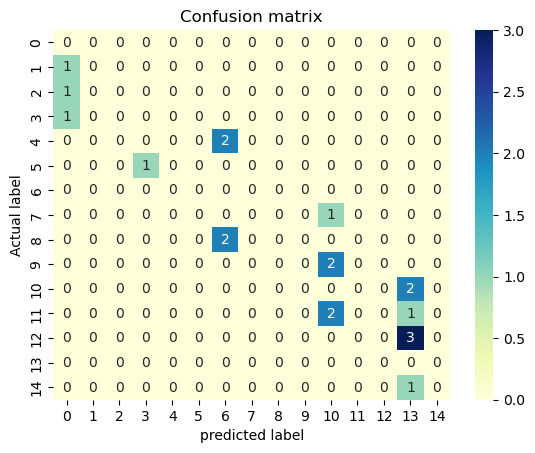

In [22]:
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap = "YlGnBu" ,fmt= 'g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('predicted label')

In [23]:
# Accuracy , Precision and Recall

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred, average='micro'))
print("Recall:", metrics.recall_score(Y_test, Y_pred, average='micro'))

Accuracy: 0.0
Precision: 0.0
Recall: 0.0


## 7. Visualization

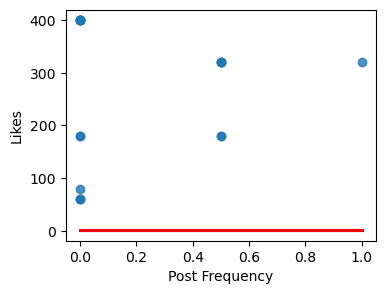

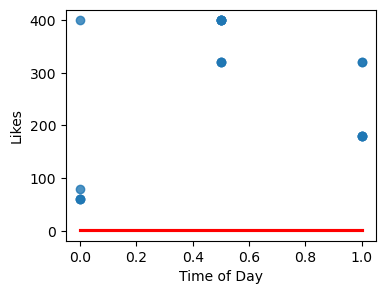

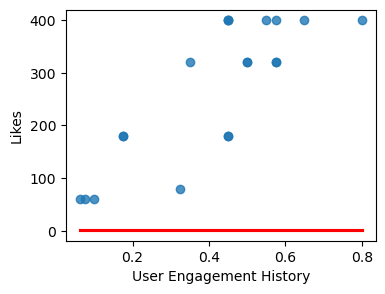

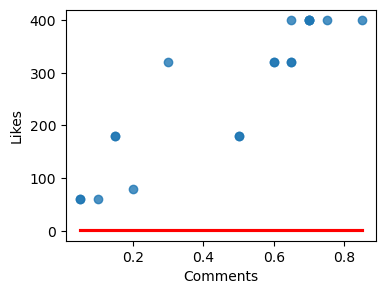

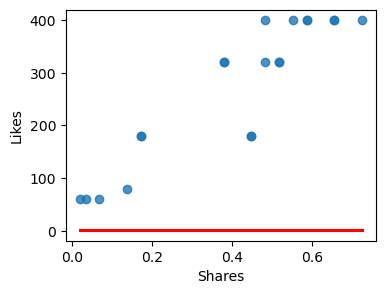

In [24]:
# visualizing the graph of every variable against the Likes variable

for i in range(5):
    plt.figure(i, figsize=(4,3))
    plt.xlabel(labels[i])
    ax=sns.regplot(x=X_test[i],y=Y_pred,data=social_media_data, logistic=True, ci=None, line_kws={'color': 'red'})
    ax.set(xlabel=labels[i] , ylabel='Likes')
    plt.show()

# Trying Decision Tree

###  Importing Libraries

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

### Model

In [26]:
x1 = social_media_data[['Post Frequency','User Engagement History','Comments','Shares']]
y1 = social_media_data['Likes']

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(x1,y1,test_size=0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(76, 4)
(20, 4)
(76,)
(20,)


In [28]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train,Y_train)

DecisionTreeClassifier()

### Prediction

In [29]:
Y_pred = decision_tree.predict(X_test)
print(Y_pred)

[320 400 350 100  75  90  70 180 300 270  65 320 320 350 320  90 420 400
 350 270]


### Accuracy

In [30]:
acc_decision_tree = round(decision_tree.score(X_train, Y_train)* 100, 2)
print(acc_decision_tree)



98.68


### Visualization

In [33]:
from sklearn.datasets import load_iris
from sklearn import tree

feature_names = x1.columns.tolist()
class_names = np.unique(Y_train).tolist()

# Convert feature names and class names to string
feature_names = [str(name) for name in feature_names]
class_names = [str(name) for name in class_names]

[Text(0.5494791666666666, 0.9545454545454546, 'Comments <= 62.5\ngini = 0.948\nsamples = 76\nvalue = [2, 1, 5, 1, 3, 1, 5, 2, 5, 3, 1, 6, 2, 4\n2, 3, 3, 2, 5, 6, 3, 1, 6, 2, 1, 1]\nclass = 180'),
 Text(0.21354166666666666, 0.8636363636363636, 'Comments <= 13.5\ngini = 0.928\nsamples = 51\nvalue = [2, 1, 5, 1, 3, 1, 5, 2, 5, 3, 1, 6, 2, 4\n2, 3, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 180'),
 Text(0.0625, 0.7727272727272727, 'User Engagement History <= 1550.0\ngini = 0.531\nsamples = 8\nvalue = [2, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 60'),
 Text(0.041666666666666664, 0.6818181818181818, 'Shares <= 5.5\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 60'),
 Text(0.020833333333333332, 0.5909090909090909, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]\nclass = 50'),
 Text(0.0625, 0.5909090909090909, 'gini

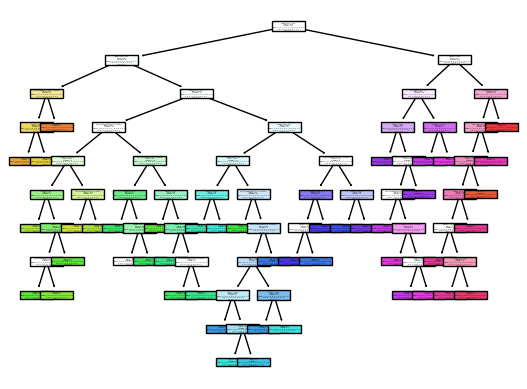

In [34]:
tree.plot_tree(decision_tree,feature_names = feature_names, class_names = class_names , filled = True)